# url: https://datawokagaku.com/hierarchical_clustering/

# 階層クラスタリング(Hierarchical Clustering)をわかりやすく解説【機械学習入門27】

前回は教師なし学習のクラスタリングの一つであるk-meansというアルゴリズムについて解説しましたが，今回はもう一つのクラスタリングのアルゴリズムである階層クラスタリングというものを紹介します．

k-meansのようにクラスタ数Kを事前に決める必要がないのでk-meansよりも便利なアルゴリズムと言っていいでしょう．

階層クラスタリングはk-meansと双璧をなすくらい有名なクラスタリングアルゴリズムで，この二つのアルゴリズムがクラスタリングのツートップといえます

機械学習としてではなく，単に「クラスター分析」をする際にも使われる手法なので，今まで機械学習をしたことがない人でも見たことがあるんじゃないかと思います．

本当にいろんなところで使われているアルゴリズムなので，今回の記事でしっかり理解しましょう！

url: https://datawokagaku.com/kmeans/

## 階層クラスタリング(Hierarchical Clustering)
階層クラスタリング(Hierarchical Clustering)は，名前の通り教師なし学習のクラスタリングアルゴリズムの一つです．

日本語では階層型クラスターとか，階層的クラスターとか色々な呼び名がありますが，本講座では階層クラスタリングと呼んでおきます．

例えば↓のようなものが階層クラスタリングです．

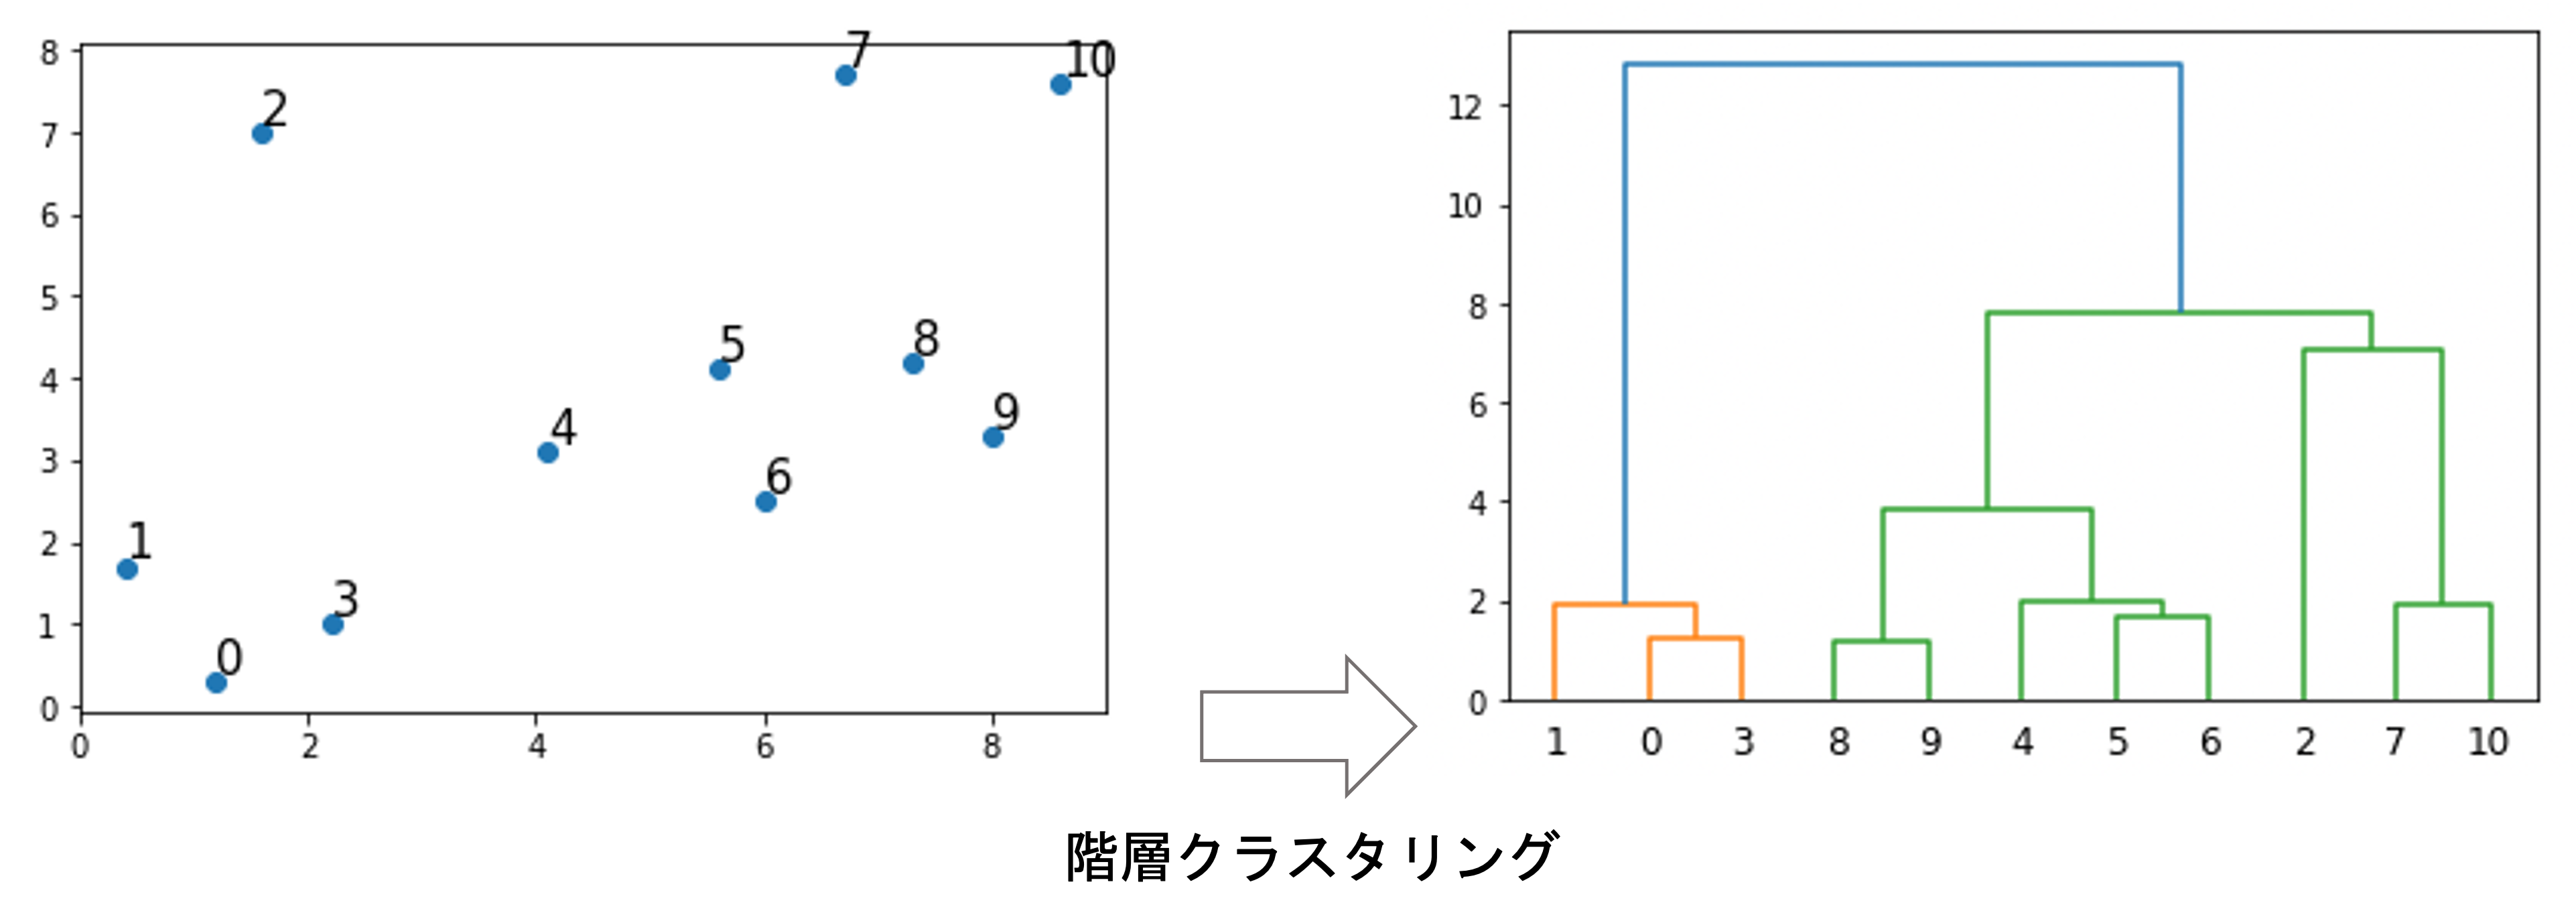

左のようなデータに対して階層クラスタリングを実施すると，右のように”階層的に”クラスタリングをしてくれます．

例えば，0と3は近いので，クラスタリングの結果でも0と3が同じクラスタになっているのが図を見てもわかると思います．

この右側の図のことをdendrogram(樹状図)といいます．是非英語名で覚えましょう！



## 階層クラスタリングのアルゴリズム
では，まずどのようにして階層クラスタリングのアルゴリズムが動いていくのか見ていきます.これもk-means同様とてもシンプルです．

1. 各データを各クラスタとする(初期設定)
2. 距離が近いクラスタ同士を融合し一つのクラスタとする
3. 2を繰り返す
4. 最終的にクラスタが一つになり終了

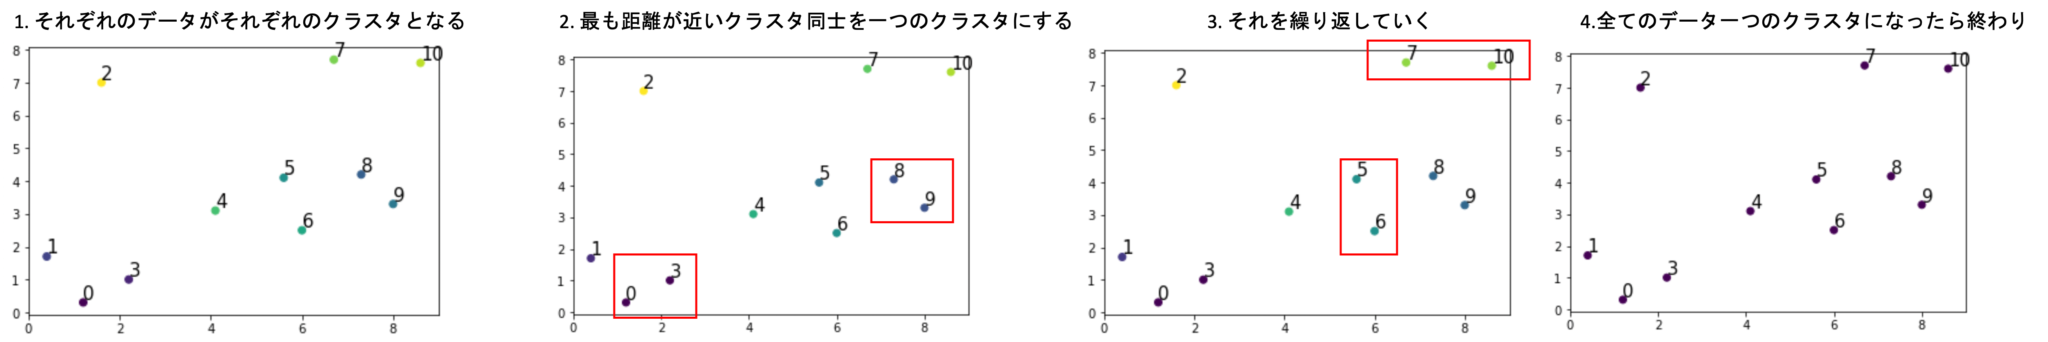

これだけです．例は2次元ですが，3次元以上の多次元でも同じです．

この結果がdendrogramという図で表され，この図にはクラスタが一つになるまでの過程が記されます

### 補足
本講座ではbottom up(agglomerative)のやり方を紹介しています．bottom upでは，最初に各データを各クラスタにしてそれらを融合していきますが，top downのやり方では最初に全てのデータを一つのクラスタとして，それを複数のクラスタに分裂させていきます．

### 補足
k-means同様，階層クラスタリングも距離を測るため多次元のデータの場合はデータの事前の標準化が推奨されます．

## dendrogramの見方
dendrogramは，横軸にそれぞれのデータ，縦軸にクラスタ(もしくはデータ)同士の”距離”(類似度)をとります．

クラスタ(もしくはデータ)同士を結ぶ線が結合する点はクラスタの融合(fuse)を意味します．

例えば8と9は最も距離が近いペアなので，一番最初に融合されています．0と3もそれと同じくらい近い距離で融合されているのがわかります．

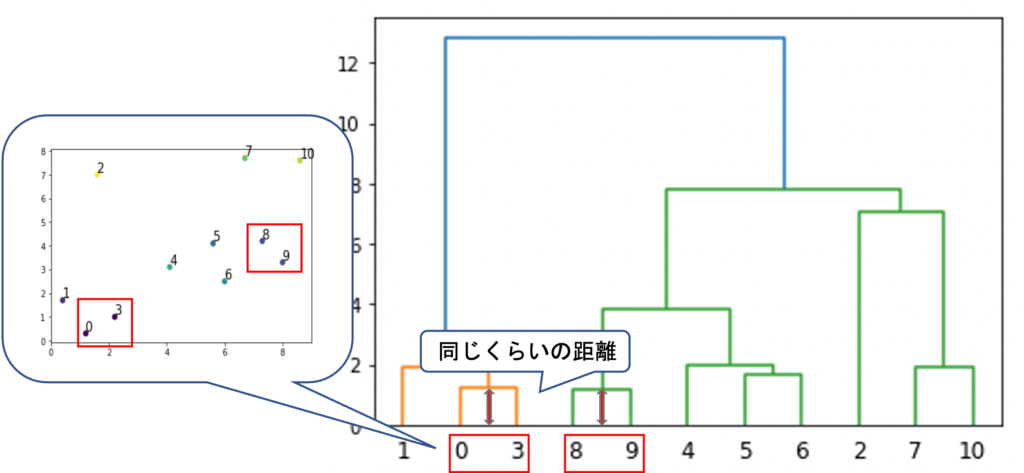

同じ様に，例えば7と10のペアは8と9のペアよりも距離があるのがわかります．

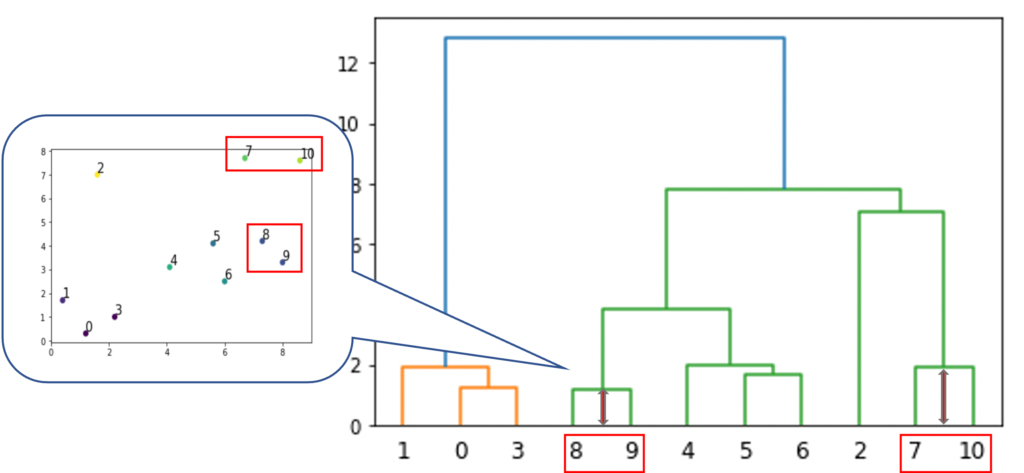

線が結合しているところはクラスタ同士の融合を意味し，高さはそのクラスタ間の距離を意味しているのがイメージできたと思います．

例えば8,9のクラスタと4, 5, 6のクラスタの融合は，2のクラスタと7,10のクラスタの融合よりも距離が近い形での融合と言えます

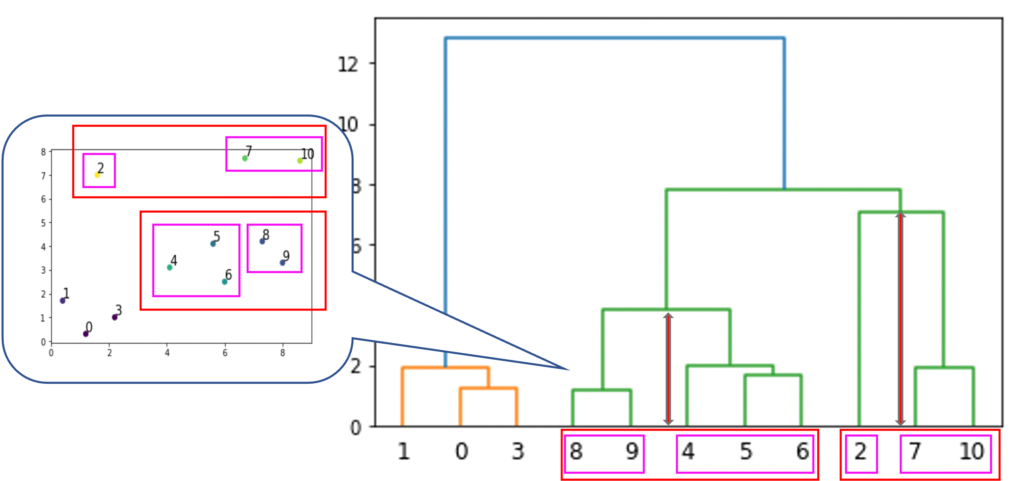

ということは，横軸の数字の並びは近いデータほど近くにあると思っていいのかな？

これは必ずしもそうとは限らないので注意が必要です．確かに1は2よりも0と3に近いですよね．

ただし，例えば8は4よりもdendrogramでは3に近いですが，実際には遠いです．

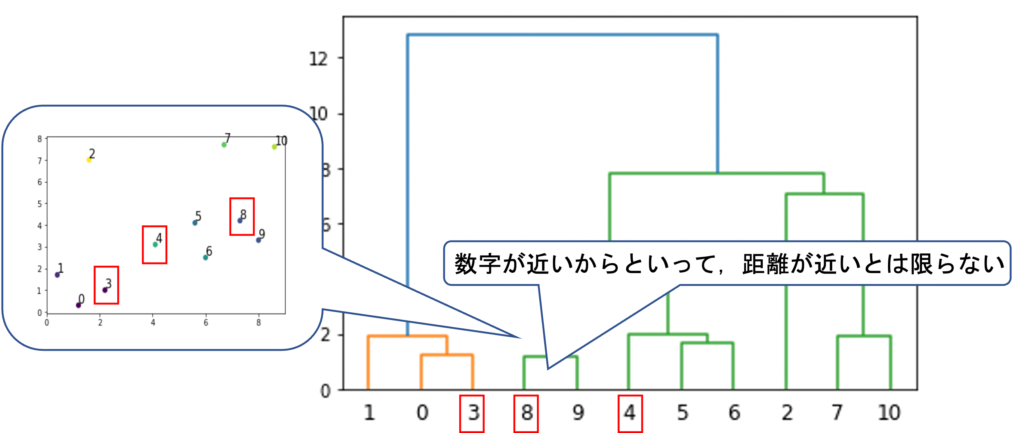

これはどういうことなの？？

これは，クラスタ内のデータは入れ替えてもdendrogramが表す情報は同じということです．つまり，以下の二つは同じdendrogramだと思ってください．数字の順番に意味はありません

このあたりはdendrogramの見方でよく間違える人が多いので注意しましょう！

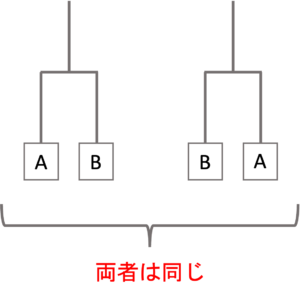

## クラスタ間の距離の測り方

クラスタ間の距離の測り方にはいくつか種類があります．全部覚える必要はなく，必要な時にググって理解できればいいでしょう．

ここではメジャーな手法とそのポイントだけ挙げておきます！

    single: クラスタ間で最も近いデータの距離
    complete: singleの逆で，クラスタ間で最も遠いデータの距離
    average: クラスタ間の全てのデータのペアの距離の平均
    centroid: それぞれのクラスタの中心間の距離
    ward(ウォード): それぞれのクラスタを一つのクラスタとみなした時の中心からの各データの距離の二乗和から，それぞれのクラスタの中心とそのクラスタ内のデータの距離の二乗和を引いた値
    
wardがちょっとわかりにくいかもしれませんが，あまり中身の詳細を理解する必要はないです(少なくとも本講座レベルでは)

ポイントとしては，ward法は計算量が多いですが，一般に分類の感度が良いのでよく使われる印象です．また，averageやcompleteはsingleよりもバランスがいいdendrogramが作れるので好まれます．

centroidは一見とても合理的で良さそうなんですが，inversionという問題が起きる可能性があるので注意です．

inversionというのは，クラスタの中心という新たな点を使うことで，次の融合の際の距離が，その前の融合の距離を下回ってしまう現象です．

例えば以下の例をみてください．a, b, cではaとbの距離が最も近いので最初に融合されてクラスタを構成しますが，その後aとbのクラスタとcを融合する際にaとbの中心を使うことで，その中心とcの距離がaとbの距離を下回ってしまい，dendrogramを描くと融合点が融合先のクラスタよりも下になってしまいます，



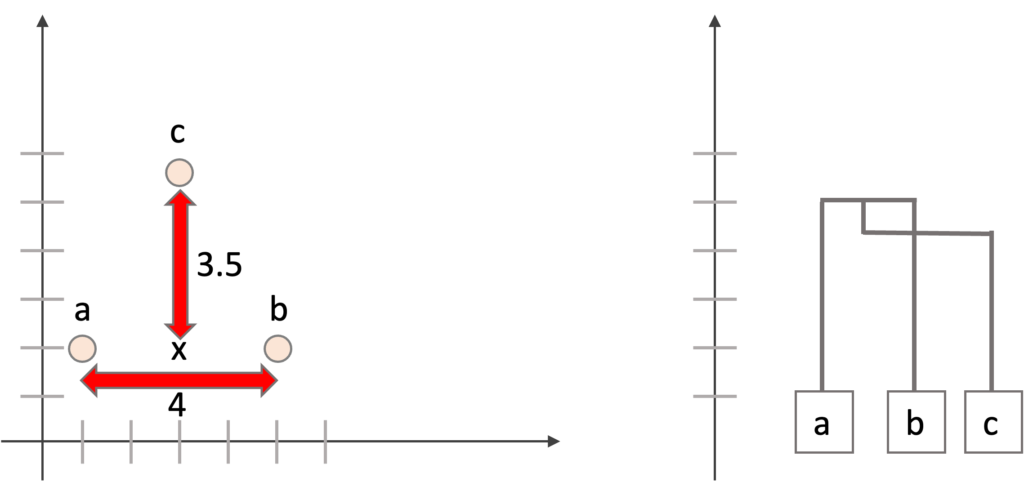

当然，これらのどれを採用するかでdendrogramは大きく変わってきます．

また，距離の定義にも色々とあります．ユークリッド距離を取るのかマンハッタン距離を取るのかで結果が変わってきます．また，相関を使って類似度を測るやり方もありますが，今回の記事ではこの辺りは割愛します．

これらは階層クラスタリングのハイパーパラメータとして色々と試し，しっくりくるものを選ぶのがいいでしょう．

url: https://ja.wikipedia.org/wiki/%E3%83%A6%E3%83%BC%E3%82%AF%E3%83%AA%E3%83%83%E3%83%89%E8%B7%9D%E9%9B%A2

url: https://ja.wikipedia.org/wiki/%E3%83%9E%E3%83%B3%E3%83%8F%E3%83%83%E3%82%BF%E3%83%B3%E8%B7%9D%E9%9B%A2#:~:text=%E3%83%9E%E3%83%B3%E3%83%8F%E3%83%83%E3%82%BF%E3%83%B3%E8%B7%9D%E9%9B%A2%EF%BC%88%E3%83%9E%E3%83%B3%E3%83%8F%E3%83%83%E3%82%BF%E3%83%B3%E3%81%8D%E3%82%87,%E9%96%93%E3%81%AE%E8%B7%9D%E9%9B%A2%E3%81%A8%E3%81%99%E3%82%8B%E3%80%82

## dendrogramの使い方

階層クラスタリングはkmeasのように特定のクラスタ数に分けるアルゴリズムではありません．

dendrogramにおいて，縦軸の任意の箇所で”切る”ことで，好きなクラスタ数でのクラスタリングをすることができるのです．

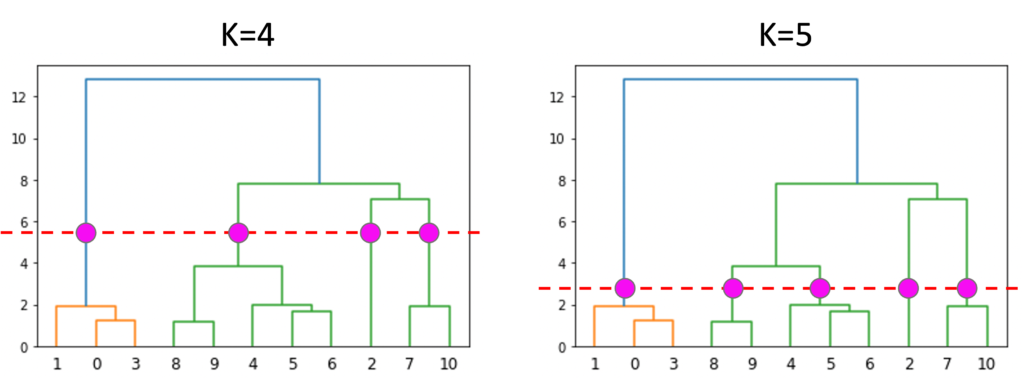

k-meansではあらかじめクラスタ数Kを決める必要があり，またそれをするのが難しかったのですが階層クラスタリングではそれをやる必要がありません．クラスタリングの結果を見てから色々とクラスタ数を変えて，どのようなクラスタになるのかを見ることができるのです．

これは非常に便利ですね！
任意のクラスタ数になるように切ってもいいですし，クラスタ内の距離の最大値からクラスタ数を決めてもいいでしょう．

これにも最適?なクラスタ数を決定してくれるやり方があったりするのですが，個人的にはあまり使わないかと思います．

それよりも，それぞれのクラスタの内容がきちんとデータの背景やユースケースに適しているか，使いやすいクラスタ分類になっているかを見た方がいいでしょう．

## 階層クラスタリングの注意点

階層クラスタリングは，クラスタの中にクラスタを作るいわゆる「ネスト型クラスタ」を作っていきます．

しかし，これは時に正しくない結果を生みます．例えば性別×血液型のようなデータの場合はそれぞれがネストの関係にないので，こういう場合は階層クラスタリングではなくk-meansなどの別のクラスタリングを使うのがベターです．

階層クラスタリングに限らず，クラスタリングアルゴリズムを使う際にはブラックボックス的に使うのではなく，事前にデータの観察をし目的を明確にしてから使いましょう！

## Pythonで階層クラスタリングをする

それではPythonでどのように階層クラスタリングができるか見てみましょう！

Pythonで階層クラスタリングを使うなら，scikit-learnよりも，scipyの scipy.cluster.hierarchy モジュールを使うのがいいです．scikit-learnにも sklearn.cluster.AgglomerativeClustering というクラスが用意されていますが， scipy.cluster.hierarchy の方が色々なことができます．



## データ準備

今回は使い方をわかりやすく解説するために，実際のデータではなくて上の例で出した擬似データを使って解説します．

まずは擬似データを以下のようにして作ります．適当なので，コピペでもいいですし，ご自身で適当にデータを作ってしまってもOKです．

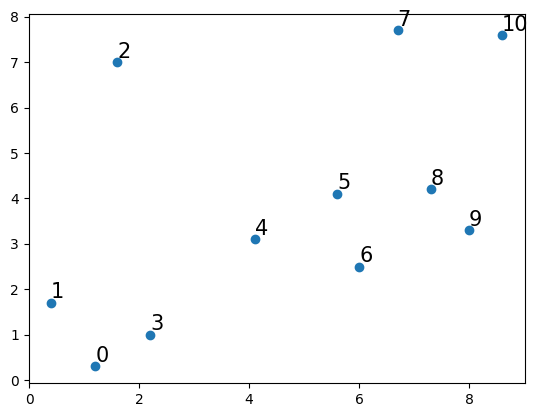

In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# 擬似データ
x1 = np.array([1.2, 0.4, 1.6, 2.2, 4.1, 5.6, 6, 6.7, 7.3, 8, 8.6])
x2 = np.array([0.3, 1.7, 7, 1, 3.1, 4.1, 2.5, 7.7, 4.2, 3.3, 7.6])

# わかりやすいように各データに数字を振る
index = np.arange(len(x1))
X = np.array(list(zip(x1, x2)))

# 可視化
plt.plot(X[:, 0], X[:, 1], 'o')
for i in np.arange(len(x1)):
    plt.annotate(f'{i}', (x1[i], x2[i]+0.1), size=15)

## 階層クラスタリング
さて，このデータセットに対して階層クラスタリングを適用させます．階層クラスタリングをするには scipy.clustering.hierarchy.linkage を使います．

linkage 関数には，データのArrayを入れればOKです．他にもmethod引数で，どの様に距離を測るかを指定することができます．今回は "ward" を指定して実行します．

In [2]:
Z = linkage(X, 'ward')
Z

array([[ 8.        ,  9.        ,  1.14017543,  2.        ],
       [ 0.        ,  3.        ,  1.22065556,  2.        ],
       [ 5.        ,  6.        ,  1.64924225,  2.        ],
       [ 7.        , 10.        ,  1.90262976,  2.        ],
       [ 1.        , 12.        ,  1.92959409,  3.        ],
       [ 4.        , 13.        ,  1.97652894,  3.        ],
       [11.        , 16.        ,  3.82848969,  5.        ],
       [ 2.        , 14.        ,  7.02614166,  3.        ],
       [17.        , 18.        ,  7.81052708,  8.        ],
       [15.        , 19.        , 12.84143979, 11.        ]])

すると，なにやらリストのリストのような結果が返ってきました．
これは，どのクラスタ同士がどの距離で融合していったかを表しています．

見方は[クラスタ1のindex, クラスタ2のindex, 距離, データの数]です．

つまり，一つ目の要素は

In [3]:
Z[0]

array([8.        , 9.        , 1.14017543, 2.        ])

8番目のクラスタ(=データ)と9番目のクラスタ(=データ)が1.14という距離で融合して，このクラスタの中には2つのデータがあることがわかります．（最初は各データが各クラスタになるので，クラスタ=データですね

なのでこのlinkageの返り値 Z を見れば，どのような順でどうクラスタが融合していったのかがわかります．

Z を見ていくと，そのうちindexが10以上のものが現れます．これは，新しく融合したクラスタのindexで， Z[idx-len(X)] でそのクラスタを見ることができます．つまり，データの数まではクラスタのindex=データのindexですが，その後はデータの数+1, データの数+2, …, とクラスタにindexが振られます
例えばidx=16のクラスタを確認したければ

In [4]:
Z[16-len(X)]

array([ 4.        , 13.        ,  1.97652894,  3.        ])

とすれば，index=4と13のクラスタが融合したクラスタであることがわかります．index=13のクラスタを確認したければ，同様に Z[13-len(X)] を見ればいいでしょう．

## dendrogram描画

dendrogramを描画するには， scipy.cluster.hierarchy.dendrogram を使います．

以下の様にlinkageの戻り値 Z を引数に渡してあげればOKです．

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [40.0, 40.0, 62.5, 62.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [51.25, 51.25, 92.5, 92.5],
  [12.5, 12.5, 71.875, 71.875]],
 'dcoord': [[0.0, 1.2206555615733705, 1.2206555615733705, 0.0],
  [0.0, 1.9295940851208404, 1.9295940851208404, 1.2206555615733705],
  [0.0, 1.1401754250991385, 1.1401754250991385, 0.0],
  [0.0, 1.6492422502470638, 1.6492422502470638, 0.0],
  [0.0, 1.9765289440498126, 1.9765289440498126, 1.6492422502470638],
  [1.1401754250991385,
   3.8284896935127475,
   3.8284896935127475,
   1.9765289440498126],
  [0.0, 1.9026297590440444, 1.9026297590440444, 0.0],
  [0.0, 7.026141662866375, 7.026141662866375, 1.9026297590440444],
  [3.8284896935127475,
   7.810527084219945,
   7.810527084219945,
   7.026141662866375],
  [1.9295940851208404,
   12.84143978522563,
   12.84143978522563,
   7.810527084219945

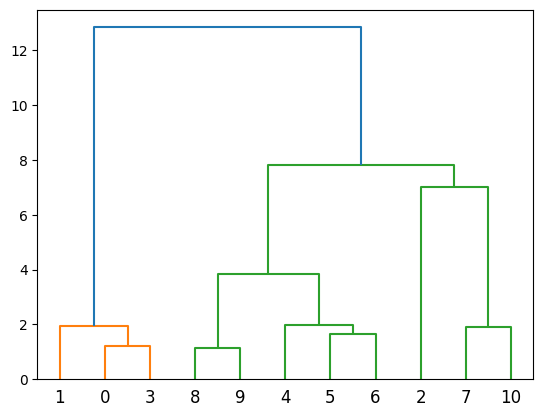

In [5]:
d = dendrogram(Z)
d

するとこのようにdendrogramが描画されます．dendrogramの返り値には，描画の際の情報をディクショナリー形式で返ってきますが，本記事では割愛します．

dendrogramには， truncate_mode 引数と p 引数を使って途中で切る(truncate)ことができます

例えばK=4の時点でtruncateするには

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5]],
 'dcoord': [[0.0, 7.026141662866375, 7.026141662866375, 0.0],
  [0.0, 7.810527084219945, 7.810527084219945, 7.026141662866375],
  [0.0, 12.84143978522563, 12.84143978522563, 7.810527084219945]],
 'ivl': ['(3)', '(5)', '2', '(2)'],
 'leaves': [15, 17, 2, 14],
 'color_list': ['C1', 'C1', 'C0'],
 'leaves_color_list': ['C0', 'C1', 'C1', 'C1']}

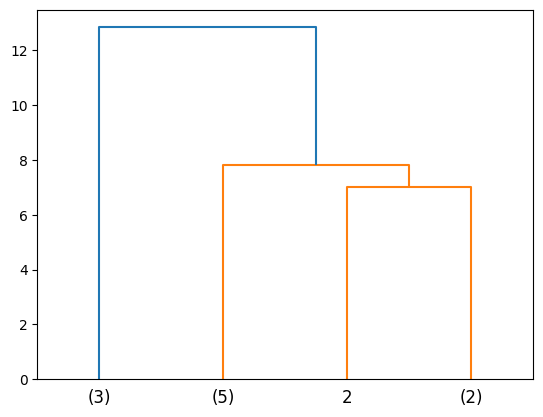

In [6]:
d = dendrogram(Z, truncate_mode='lastp', p=4)
d

のようにすれば，クラスタが4つのところで図が切れます．実際の業務ではデータ数がものすごい多いことが普通なので，最後のデータまで表示することはほとんどなく，この様に途中で切って表示します．

図の線の先端(線を枝，先端を葉と言います．)のカッコ()内の数字はそのクラスタ内に含むデータ数です．データ数が一つの場合は，上図の2のようにindexが表示されます．

## クラスタラベルの取得
それでは，各データに対してのクラスタのラベルを取得しましょう．このラベルデータがあると，データの描画に使えたり何かと便利ですよね

これには scipy.cluster.hierarchy.fcluster を使います．第一引数にlinkageの戻り値 Z ,第二引数 t にある値を指定します．第二引数 t に指定する値は，引数 criterion に何を指定するかによります．

今回は criterion には "maxclust" を指定します．これは，クラスタの最大数を指定するやり方でtには最大クラスタ数を指定します．他のパラメータについては公式ドキュメントをチェックしてください！

In [7]:
# ラベル取得
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z ,t=4, criterion='maxclust')
clusters

array([1, 1, 4, 1, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

こんな感じで，それぞれのデータがどのクラスタに属するのかがわかります．

例えばこんな感じで色分けして結果を表示することができます．

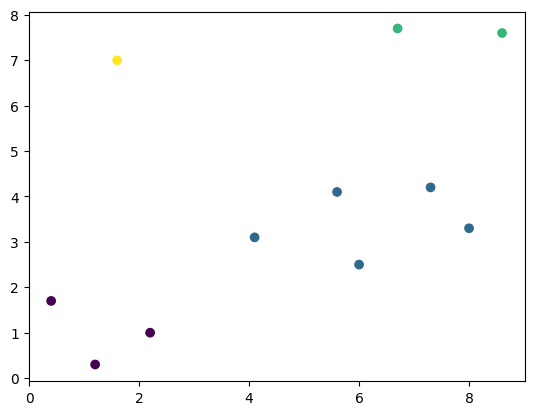

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], c=clusters)

このように，dendrogramを参考に適切なKを見つけ，ラベルを付与して描画することでクラスタリングの結果をわかりやすく可視化することができます．

## まとめ

今回は階層クラスタリングについて解説をしました．

    階層クラスタリングは，k-meansと双璧をなすほど有名なクラスタリングアルゴリズム
    階層クラスタリングはk-meansと違いクラスタ数をあらかじめ決める必要がない
    階層クラスタリングによってdendrogramを描画できる
    dendrogramを見ることで，どのようにクラスタが融合されていったのかがわかる
    階層クラスタではクラスタをネストするので，本来ネスト関係にないクラスタの場合正しくない結果になることがある
    クラスタ間の距離の測り方にはさまざまな手法があり，どの手法を使うかによってdendrogramの結果が大きく変わる

階層クラスタリングは，k-meansと同じくらいよく使われるクラスタリングの手法で，クラスタ数をあらかじめ決める必要がないという点でk-meansより使い勝手がいいのでよく好まれます．

一方，設定するハイパーパラメータが多かったり，dendrogramの情報量が多いことが原因で結果を正しく解釈できなくなってしまうケースも多いです．

きちんと有用に使うためには，アルゴリズムの中身を理解しておく必要があるので今回の記事でしっかり理解しておきましょう！

